In [111]:
%config InlineBackend.figure_format = 'retina'

# Bars charts, pie charts, and heatmaps

## Bar plots


In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "Farm A": [50, 75, 36],
    "Farm B": [15, 98, 33],
    "Farm C": [0, 20, 77],
}
columns = ["Grain", "Wheat", "Barley"]

farm_data = pd.DataFrame.from_dict(data, orient="index", columns=columns)
df

,Grain,Wheat,Barley
Farm A,50,75,36
Farm B,15,98,33
Farm C,0,20,77


### Standard bar plots

Vertical

In [113]:
total = farm_data.sum()
total

Grain      65
Wheat     193
Barley    146
dtype: int64

Text(0, 0.5, 'Quantity (Tons)')

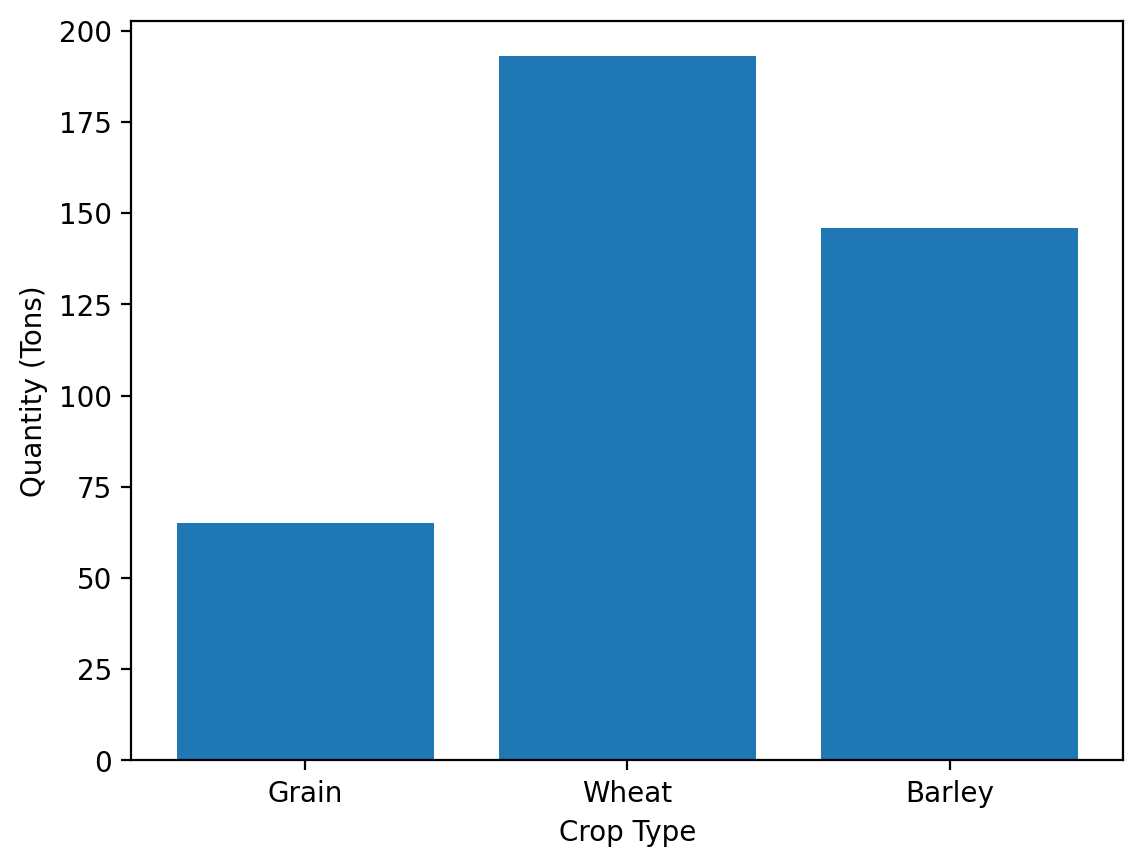

In [114]:
fig, ax = plt.subplots()

ax.bar(total.index,height=total.values)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')



Horizontal



Text(0, 0.5, 'Crop Type')

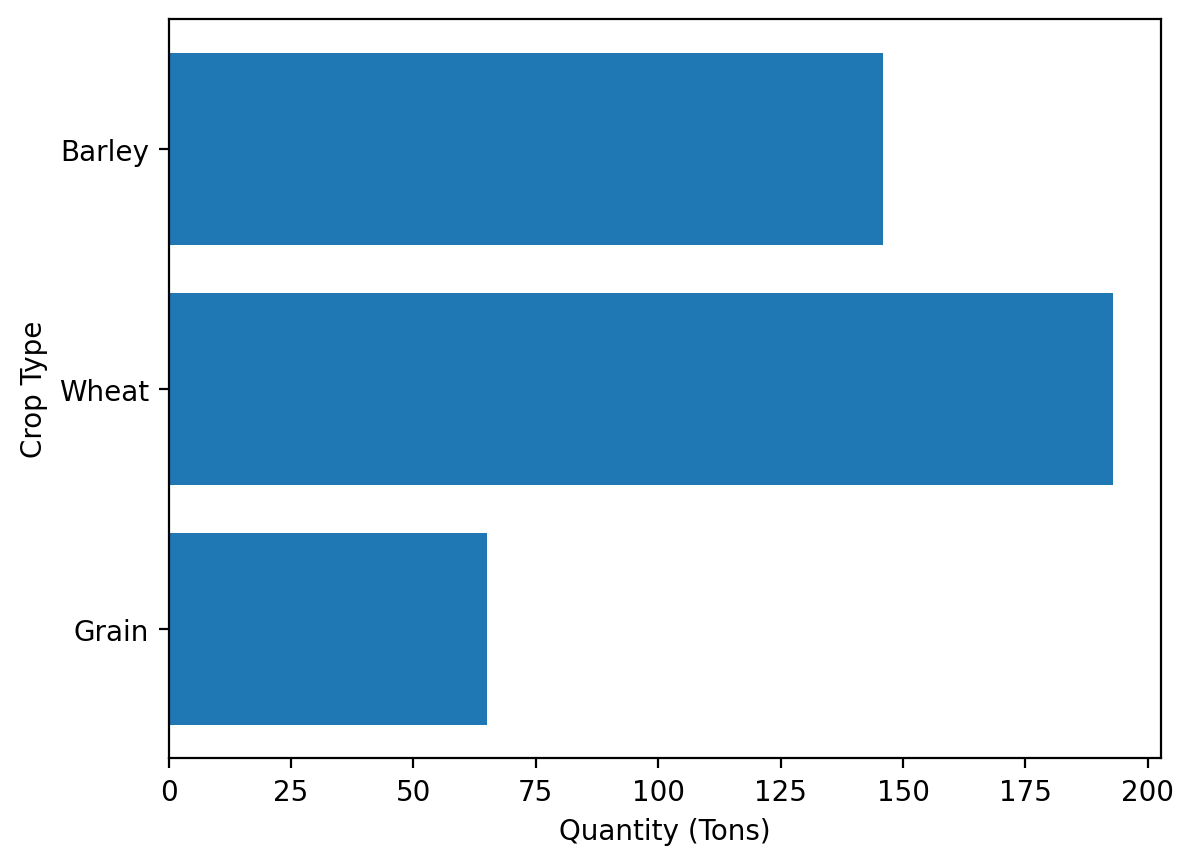

In [115]:
fig, ax = plt.subplots()

ax.barh(total.index,width=total.values)
ax.set_xlabel('Quantity (Tons)')
ax.set_ylabel('Crop Type')

### Stacked bar plots

Creating stacked bar plots requires that we specify a baseline for each plot and add to it as we go to "stack" one plot on top of the other. Let's set a different baseline for each plot to show how that would look:

Text(0, 0.5, 'Quantity (Tons)')

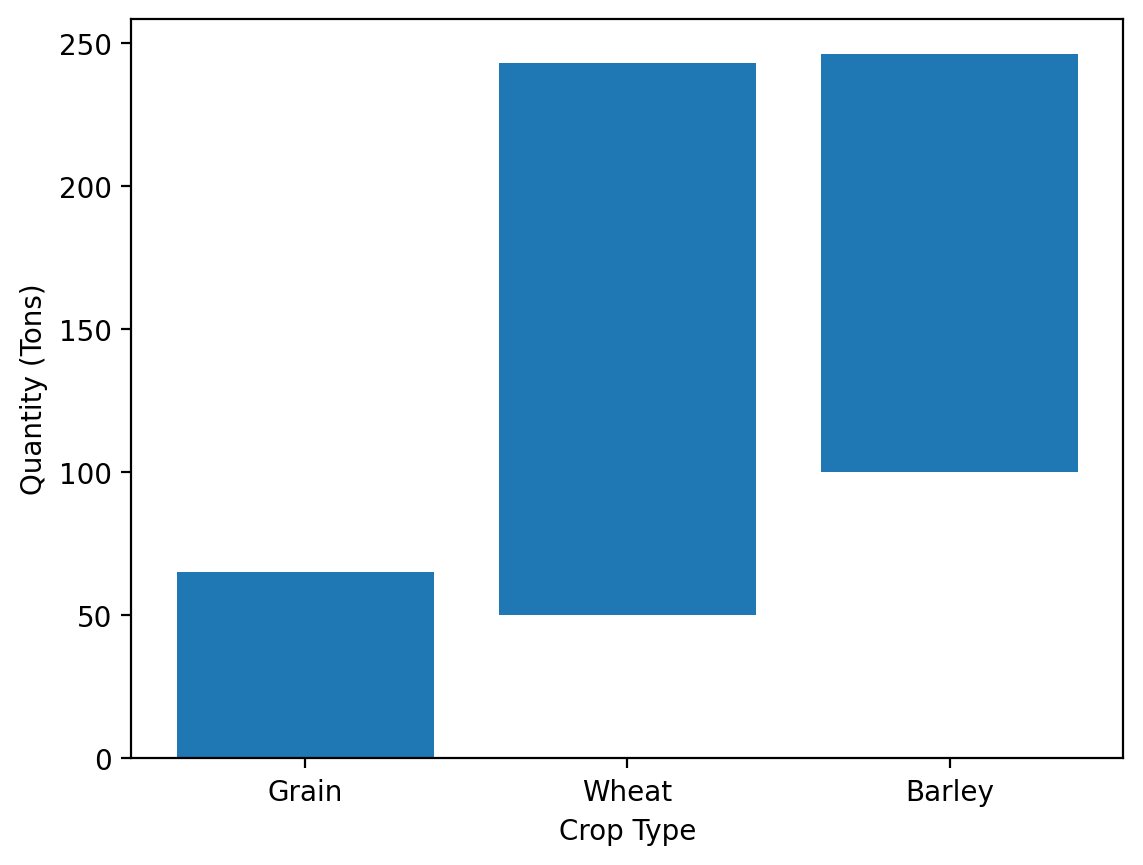

In [116]:
fig, ax = plt.subplots()

bottom = np.array([0,50,100])

ax.bar(total.index,height=total.values, bottom=bottom)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')


Note that this shifts where each bar begins. We can use this to make our stacked bar plot by plotting each element, and adding it as a new set of bars. Let's start by plotting just one farm instead of the totals:

Text(0, 0.5, 'Quantity (Tons)')

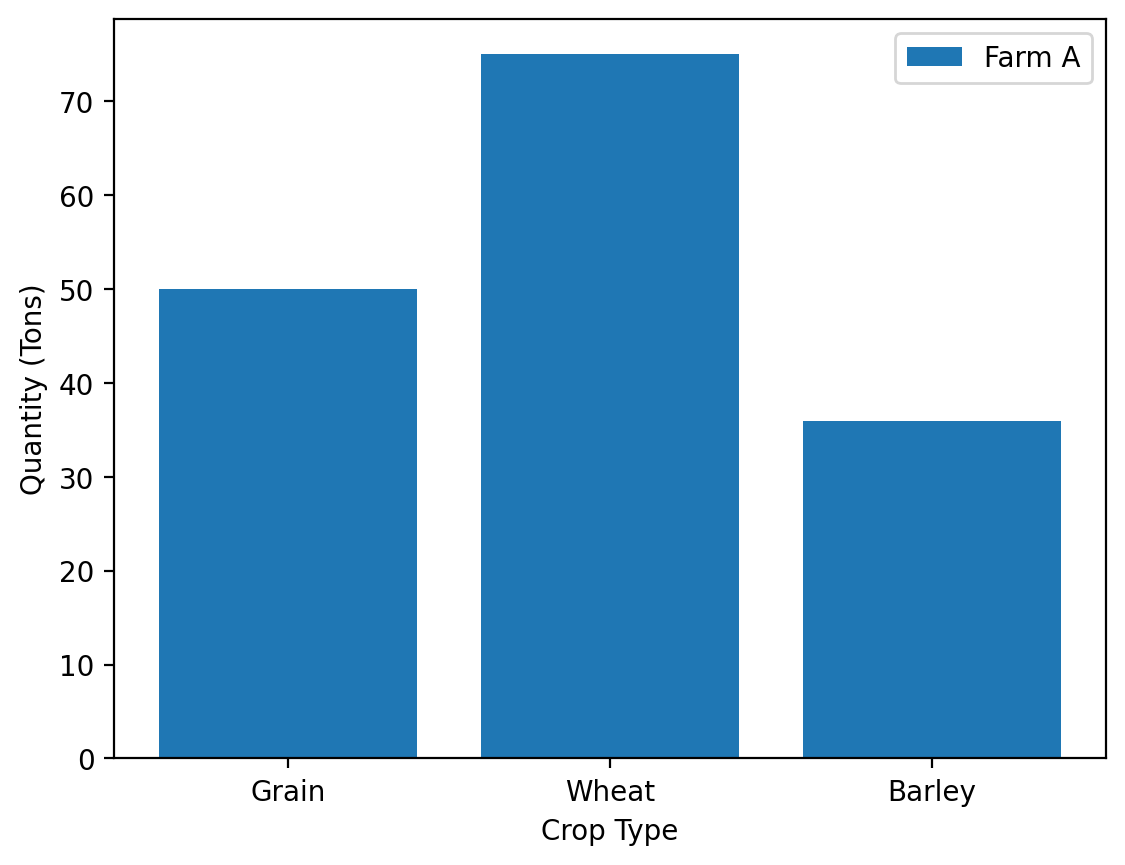

In [117]:
fig, ax = plt.subplots()

ax.bar(farm_data.columns,farm_data.loc['Farm A'].values, label='Farm A')

ax.legend()
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')

Now, let's iterate through each row of the `farm_data` DataFrame and plot it to make the stacked bar plot:

Text(0, 0.5, 'Quantity (Tons)')

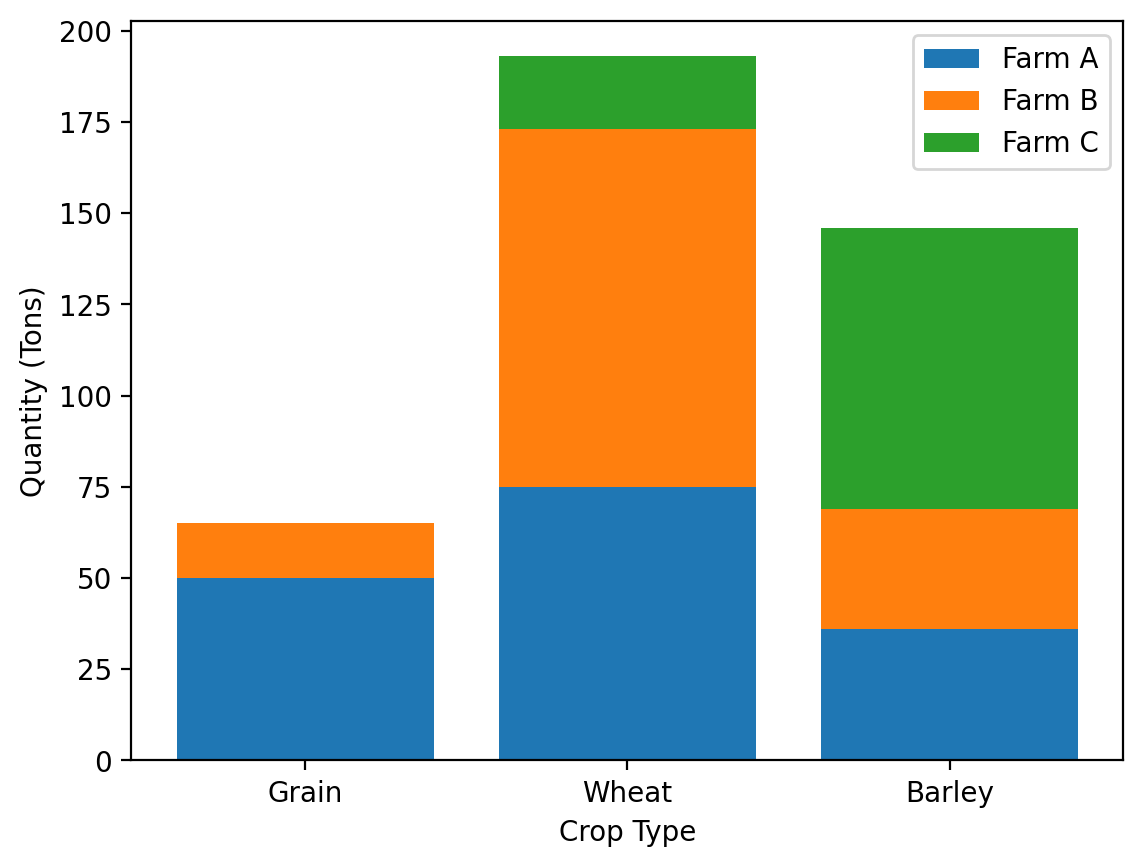

In [118]:
fig, ax = plt.subplots()

bottom = np.zeros(3)

for farm_name, farm_crop_yields in farm_data.iterrows():
    ax.bar(farm_crop_yields.index, farm_crop_yields.values, label=farm_name, bottom=bottom)
    bottom += farm_crop_yields

ax.legend()
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')



### Grouped bar plots

Grouped bar plots require that we do a small amount of math to get them to work. We needs to tell matplotlib where we want each of the bars to go. Let's look at how we do this, then explain how it's made:

Text(0, 0.5, 'Quantity (Tons)')

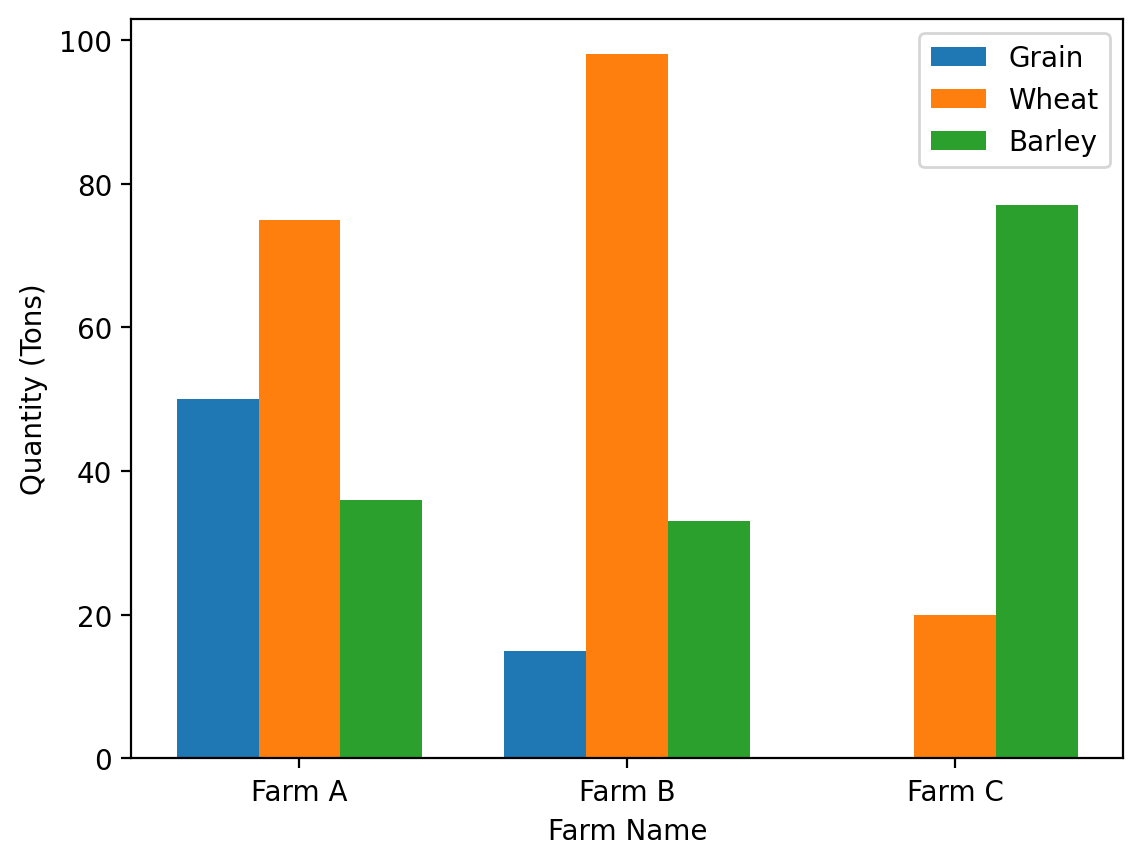

In [119]:
fig, ax = plt.subplots()

num_columns = farm_data.shape[0] # Number of bars per group
num_rows = farm_data.shape[1] # Number of groups

x_values = np.arange(num_rows)

bar_width = 1 / (num_columns + 1)  # width of the bars. This should be 1 / (N+1) where N is the number of bars per group
column_count = 0

for crop_name, farm_crop_yields in farm_data.items():
    offset = bar_width * column_count
    ax.bar(x_values + offset, farm_crop_yields.values, width=bar_width, label=crop_name)
    column_count += 1

tick_locations = x_values + (1 - offset) / 2
ax.set_xticks(tick_locations)
ax.set_xticklabels(farm_data.index)

ax.legend()
ax.set_xlabel('Farm Name')
ax.set_ylabel('Quantity (Tons)')

## Pie charts

Pie charts are easy in matplotlib

([<matplotlib.patches.Wedge at 0x143560200>,
 [Text(0.962450074274041, 0.5326254354890437, 'Grain'),
  Text(-0.8889120235622774, 0.647947076825274, 'Wheat'),
  Text(0.46401849921153376, -0.9973398780703978, 'Barley')])

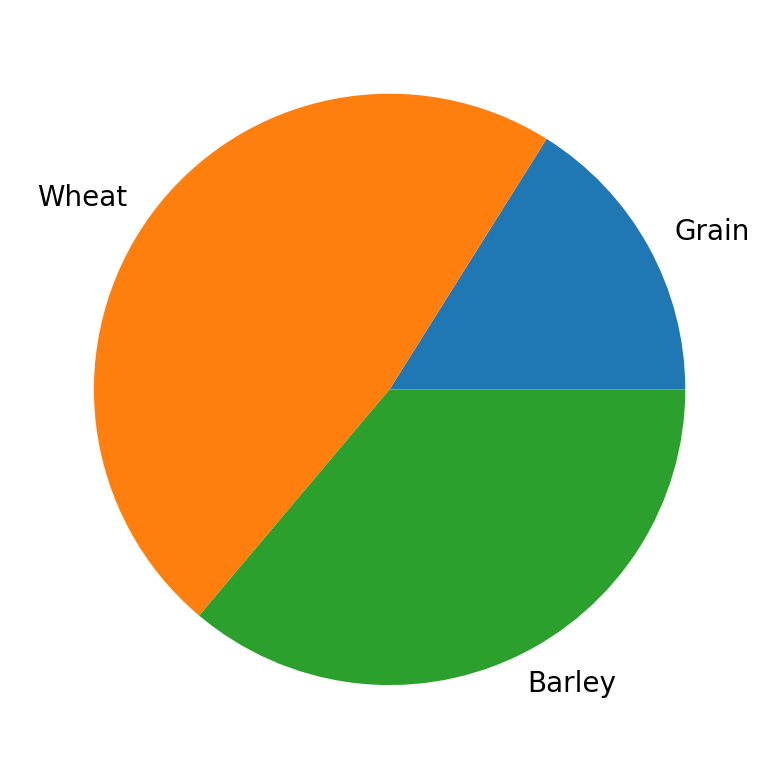

In [120]:
fig, ax = plt.subplots()

ax.pie(total, labels=total.index)

([<matplotlib.patches.Wedge at 0x143107740>,
 [Text(0.962450074274041, 0.5326254354890437, 'Grain'),
  Text(-0.8889120235622774, 0.647947076825274, 'Wheat'),
  Text(0.46401849921153376, -0.9973398780703978, 'Barley')],
 [Text(0.5249727677858405, 0.29052296481220563, '16.1%'),
  Text(-0.48486110376124214, 0.3534256782683312, '47.8%'),
  Text(0.2531009995699275, -0.5440035698565806, '36.1%')])

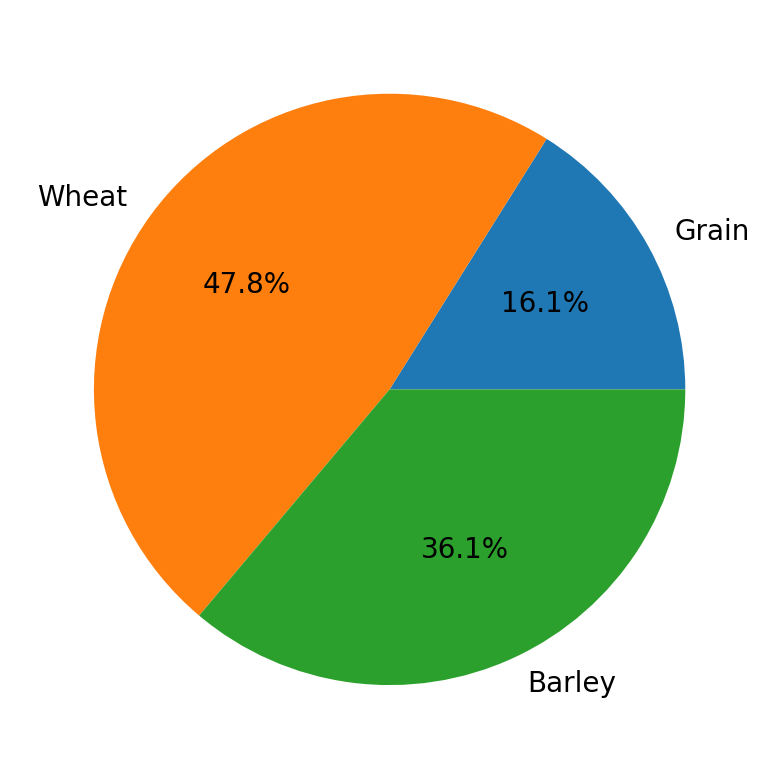

In [121]:
fig, ax = plt.subplots()

ax.pie(total, labels=total.index, autopct='%1.1f%%')

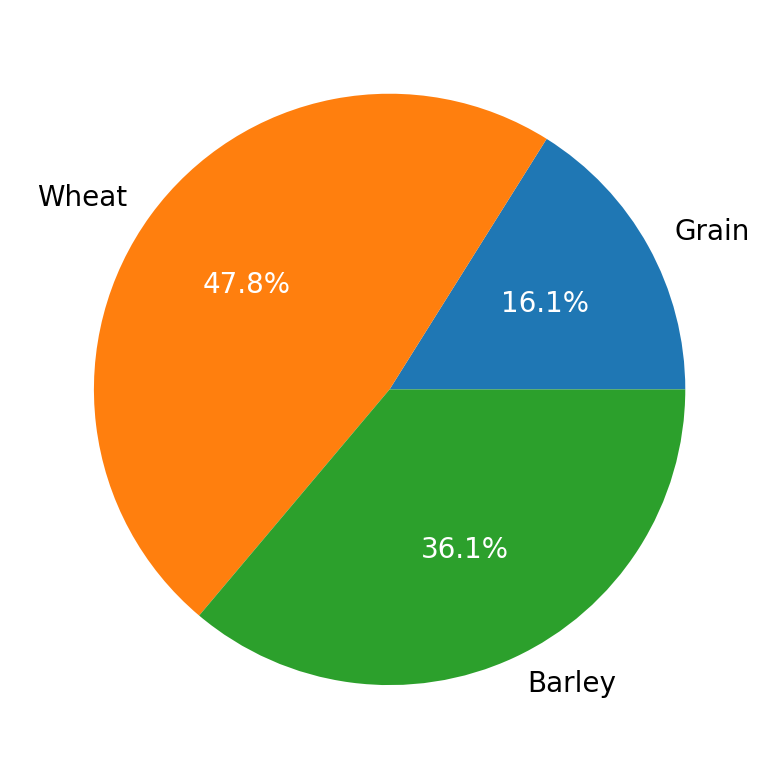

In [122]:
fig, ax = plt.subplots()

_,_,autotexts = ax.pie(total, labels=total.index, autopct='%1.1f%%')

for text in autotexts:
    text.set_color('white')

## Heat maps

Sometimes we want to show data in a table, but one where patterns become more obvious when viewed as an image

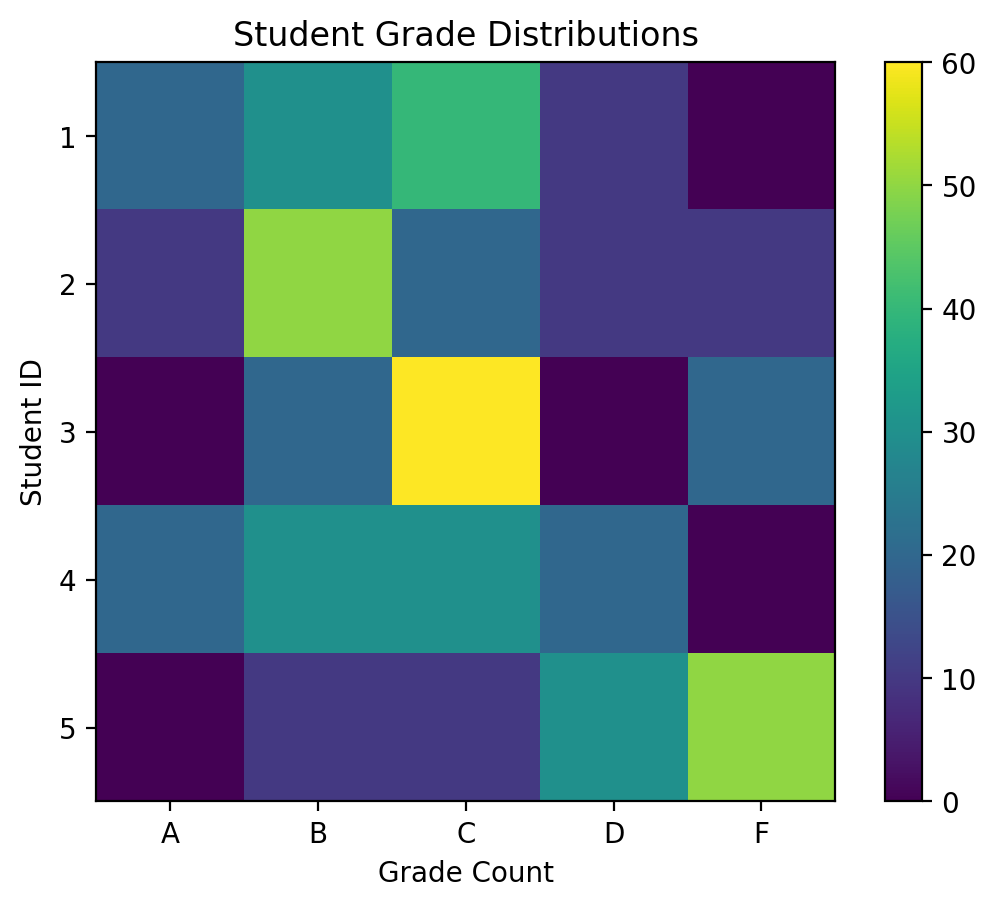

In [142]:
import matplotlib.pyplot as plt
import numpy as np

xlabels = ["A", "B", "C", "D", "F"]
ylabels = ["1", "2", "3", "4", "5"]

correlation_matrix = np.array([ [20, 30, 40, 10, 0],
                                [10, 50, 20, 10, 10],
                                [0, 20, 60, 0, 20],
                                [20, 30, 30, 20, 0],
                                [0, 10, 10, 30, 50]])

fig, ax = plt.subplots()

heatmap = ax.imshow(correlation_matrix)

ax.set_xticks(np.arange(len(xlabels)))
ax.set_xticklabels(xlabels)
ax.set_yticks(np.arange(len(ylabels)))
ax.set_yticklabels(ylabels)

plt.colorbar(heatmap)

ax.set_xlabel("Grade Count")
ax.set_ylabel("Student ID")
ax.set_title("Student Grade Distributions")
plt.show()

Sometimes, it's clearer to directly write the numbers in the image along with the colors for reference, which can be accomplished as shown below:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xlabels = ["A", "B", "C", "D", "F"]
ylabels = ["1", "2", "3", "4", "5"]

correlation_matrix = np.array([ [20, 30, 40, 10, 0],
                                [10, 50, 20, 10, 10],
                                [0, 20, 60, 0, 20],
                                [20, 30, 30, 20, 0],
                                [0, 10, 10, 30, 50]])

fig, ax = plt.subplots()

ax.imshow(correlation_matrix)

ax.set_xticks(np.arange(len(xlabels)))
ax.set_xticklabels(xlabels)
ax.set_yticks(np.arange(len(ylabels)))
ax.set_yticklabels(ylabels)

for row in range(correlation_matrix.shape[0]):
    for column in range(correlation_matrix.shape[1]):
        ax.text(row, column, correlation_matrix[column,row],
                ha="center", va="center", color="w")

ax.set_xlabel("Grade Count")
ax.set_ylabel("Student ID")
ax.set_title("Student Grade Distributions")
plt.show()

Now let's see how this could be applied to a more complex problem, in this case, a two dimensional histogram!